In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from function_helper import correlations

In [4]:
df = pd.read_parquet('data/rain_tots_plants_v2.parquet')
rain = pd.read_parquet('data/rain_v2.parquet')
prod = pd.read_parquet('data/prod_v2.parquet')
lots = pd.read_parquet('data/lots_v2.parquet')

## Exploratory data analysis - Rainfall

First I'll make a bar plot showing the mean rainfall totals across all years in each month with the standard error on each mean.

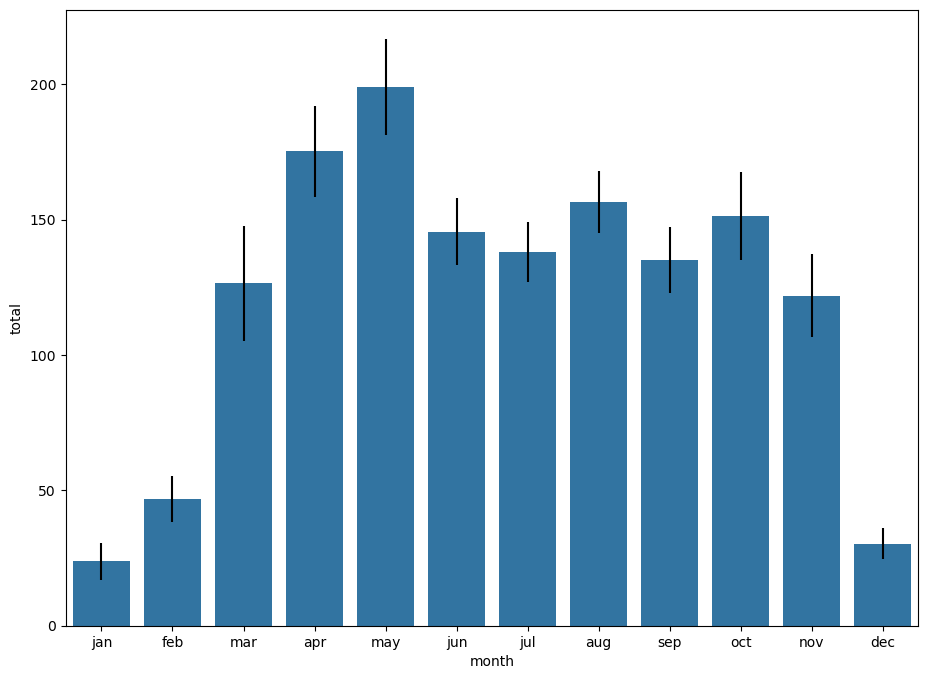

In [5]:
plt.figure(figsize=(11,8), dpi=100)
sns.barplot(y=rain.groupby('month')['total'].mean(), x=rain.groupby('month')['total'].mean().index, 
           order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
           color='tab:blue',
           yerr=rain.groupby('month')['total'].sem());

We can see a clear wet-dry climate pattern where winter is dry, rainfall increases during March, peaks in May, and drops significantly again in December. 

Next I'll make a cluster map showing the correlations between parameters and hierarchical clusters in the data. For the hierarchical clustering I use a ward linkage method, which merges clusters that minimize the increase in cluster variance after merging.

<Figure size 3000x2400 with 0 Axes>

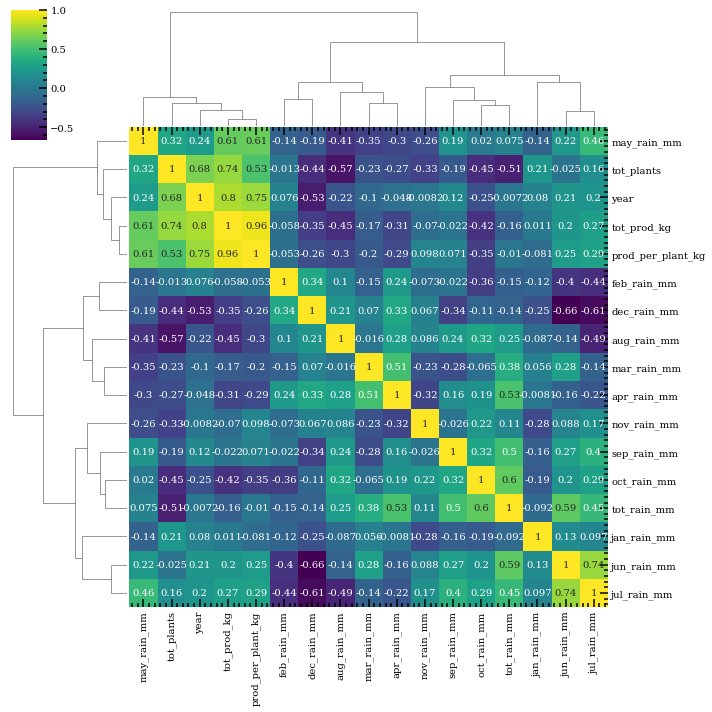

In [5]:
plt.figure(figsize=(15,12), dpi=200)
sns.clustermap(df.corr(), cmap='viridis', method='ward', annot=True);

We can see from the cluster map that there are three large scale groups or clusters in the data. The group with the highest correlation between features includes may rainfall, total plants, year, total production, and production per plant. The other two clusters contain only monthly rainfall totals. This suggests that May rainfall may be a useful predictor of production, which we will investigate further. The total number of plants is also highly correlated with year, so we would expect production to increase with year, given the fact that having more plants result in a higher coffee production.

We want to investigate what correlates highly with production so we try to increase it in the future. Let's also engineer some new features to look for other significant correlations with production. I'll make quarterly rainfall totals, half-year rainfall totals, and pairs of months.

In [6]:
df['q1_rain_mm'] = df.jan_rain_mm + df.feb_rain_mm + df.mar_rain_mm
df['q2_rain_mm'] = df.apr_rain_mm + df.may_rain_mm + df.jun_rain_mm
df['q3_rain_mm'] = df.jul_rain_mm + df.aug_rain_mm + df.sep_rain_mm
df['q4_rain_mm'] = df.oct_rain_mm + df.nov_rain_mm + df.dec_rain_mm

df['h1_rain_mm'] = df.jan_rain_mm + df.feb_rain_mm + df.mar_rain_mm + df.apr_rain_mm + df.may_rain_mm + df.jun_rain_mm
df['h2_rain_mm'] = df.jul_rain_mm + df.aug_rain_mm + df.sep_rain_mm + df.oct_rain_mm + df.nov_rain_mm + df.dec_rain_mm

df['p1_rain_mm'] = df.jan_rain_mm + df.feb_rain_mm
df['p2_rain_mm'] = df.mar_rain_mm + df.apr_rain_mm
df['p3_rain_mm'] = df.may_rain_mm + df.jun_rain_mm
df['p4_rain_mm'] = df.jul_rain_mm + df.aug_rain_mm
df['p5_rain_mm'] = df.sep_rain_mm + df.oct_rain_mm
df['p6_rain_mm'] = df.nov_rain_mm + df.dec_rain_mm

Next I'll calculate Pearson correlation coefficients and their p-values significances 

In [7]:
stats = correlations(df)

In [12]:
stats

,pearson_corr,pval,is_significant
prod_per_plant_kg,0.956961,9.414921e-20,1.0
year,0.799194,1.151191e-13,1.0
tot_plants,0.738667,1.594723e-12,1.0
may_rain_mm,0.605169,4.187665e-07,1.0
p3_rain_mm,0.558862,6.682617e-05,1.0
q2_rain_mm,0.324266,6.143919e-02,0.0
jul_rain_mm,0.274594,3.140875e-02,1.0
jun_rain_mm,0.204311,1.518535e-01,0.0
h1_rain_mm,0.106702,7.229899e-01,0.0
jan_rain_mm,0.010792,3.070505e-01,0.0


In [13]:
df.columns

Index(['year', 'tot_plants', 'tot_prod_kg', 'prod_per_plant_kg', 'jan_rain_mm',
       'feb_rain_mm', 'mar_rain_mm', 'apr_rain_mm', 'may_rain_mm',
       'jun_rain_mm', 'jul_rain_mm', 'aug_rain_mm', 'sep_rain_mm',
       'oct_rain_mm', 'nov_rain_mm', 'dec_rain_mm', 'tot_rain_mm',
       'q1_rain_mm', 'q2_rain_mm', 'q3_rain_mm', 'q4_rain_mm', 'h1_rain_mm',
       'h2_rain_mm', 'p1_rain_mm', 'p2_rain_mm', 'p3_rain_mm', 'p4_rain_mm',
       'p5_rain_mm', 'p6_rain_mm'],
      dtype='object')

<AxesSubplot:xlabel='p3_rain_mm', ylabel='tot_prod_kg'>

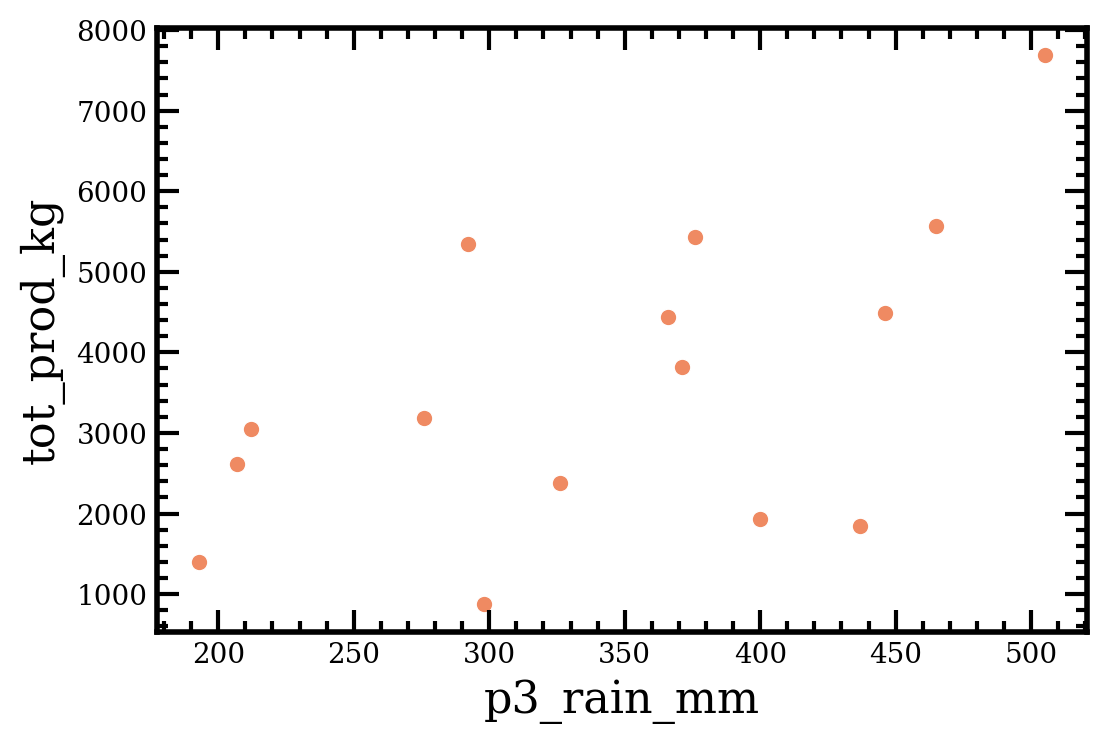

In [14]:
plt.figure(dpi=200)
sns.scatterplot(data=df, x='p3_rain_mm', y='tot_prod_kg')

<AxesSubplot:xlabel='may_rain_mm', ylabel='tot_prod_kg'>

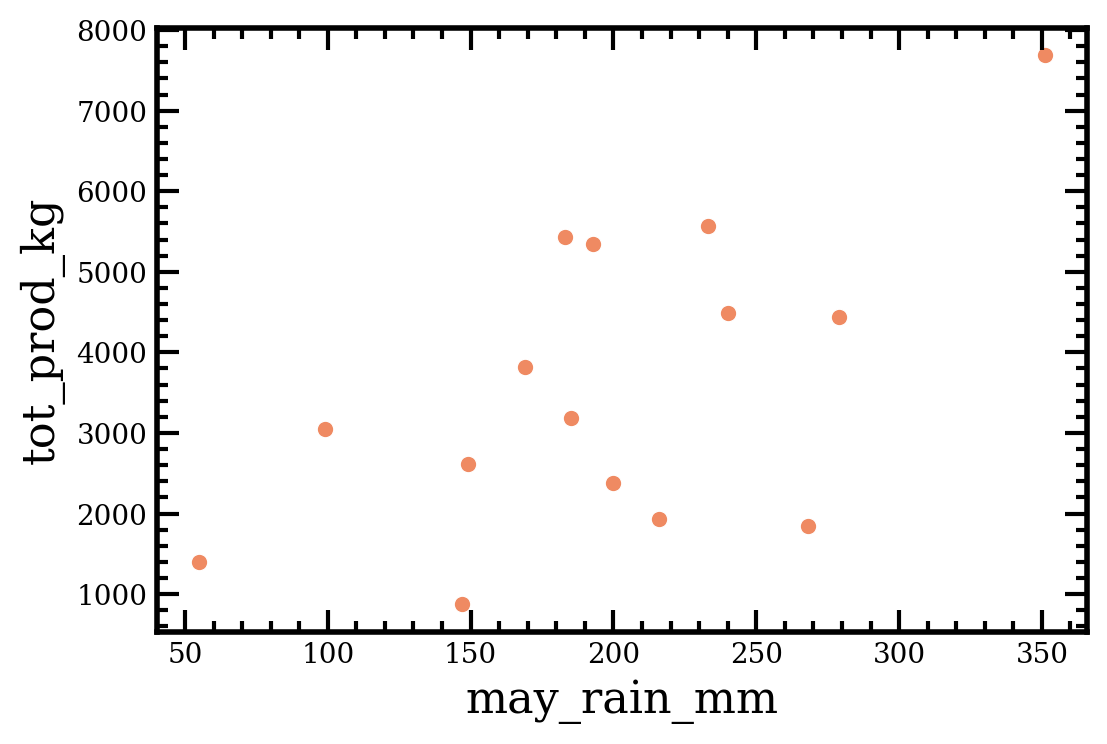

In [15]:
plt.figure(dpi=200)
sns.scatterplot(data=df, x='may_rain_mm', y='tot_prod_kg')

<AxesSubplot:xlabel='tot_plants', ylabel='tot_prod_kg'>

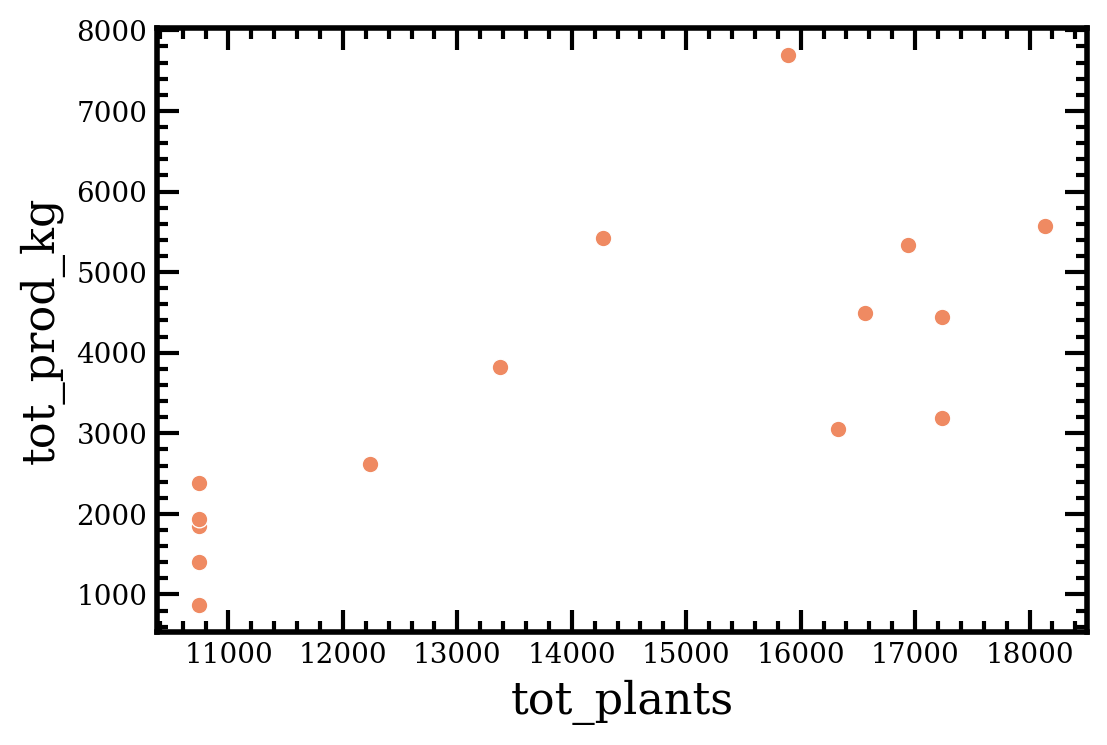

In [16]:
plt.figure(dpi=200)
sns.scatterplot(data=df, x='tot_plants', y='tot_prod_kg')

<AxesSubplot:xlabel='year', ylabel='tot_prod_kg'>

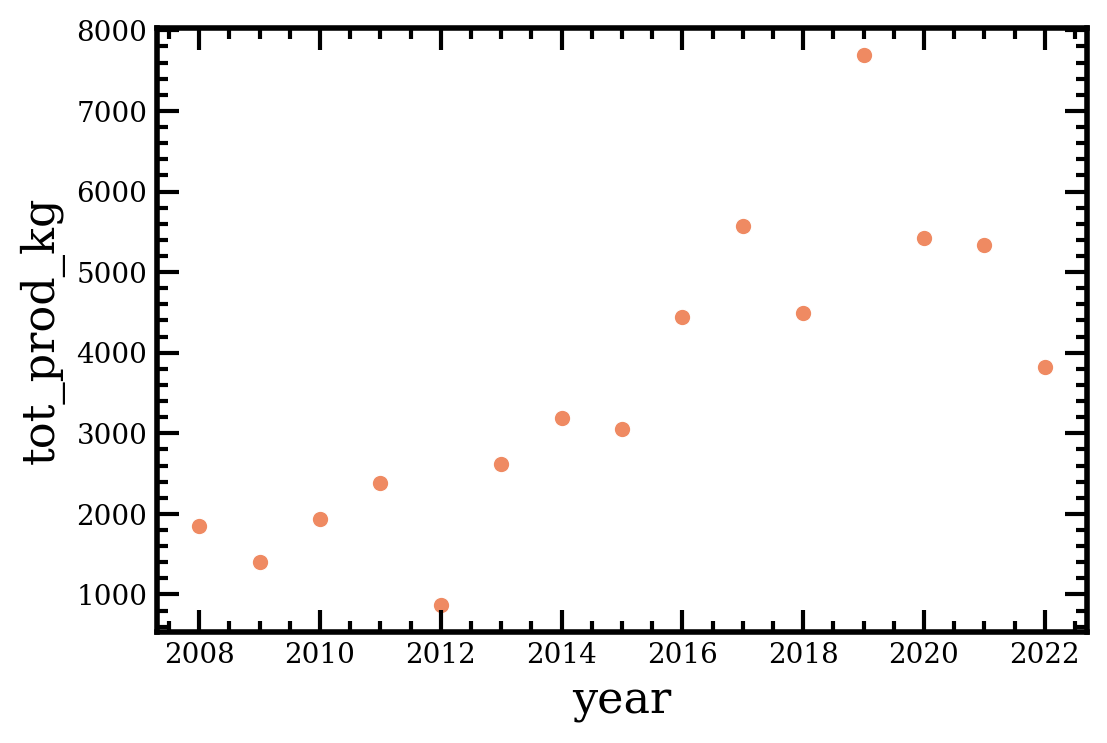

In [17]:
plt.figure(dpi=200)
sns.scatterplot(data=df, x='year', y='tot_prod_kg')

<AxesSubplot:xlabel='prod_per_plant_kg', ylabel='tot_prod_kg'>

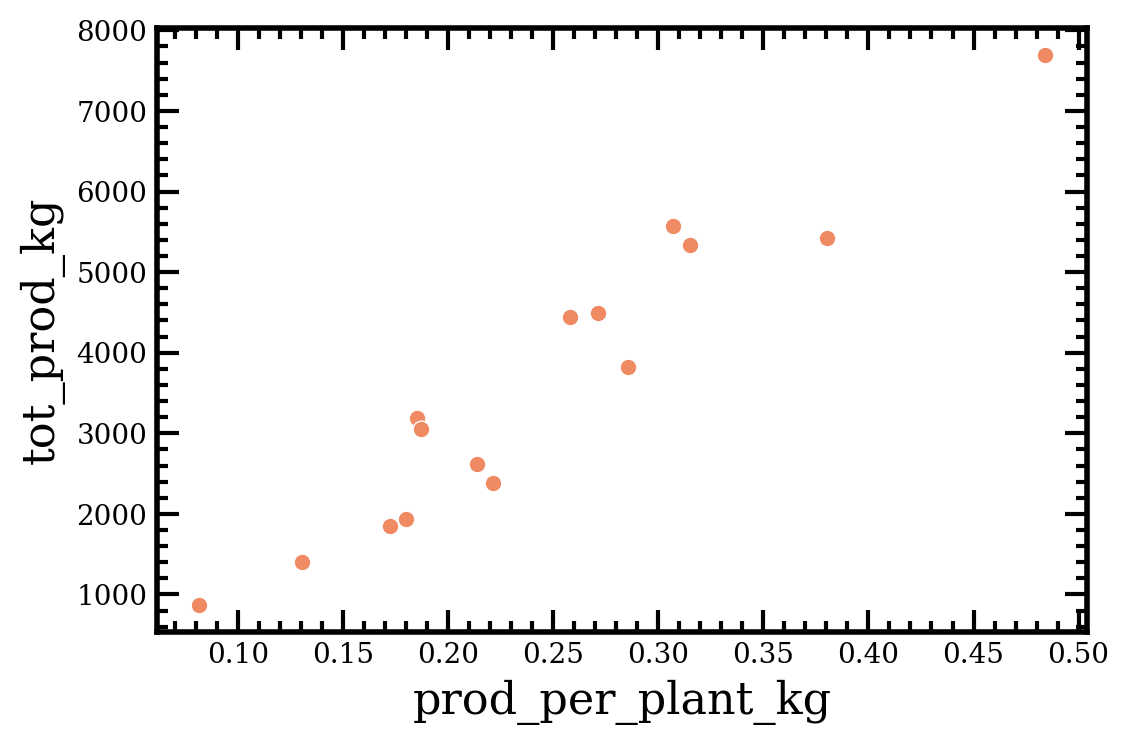

In [18]:
plt.figure(dpi=200)
sns.scatterplot(data=df, x='prod_per_plant_kg', y='tot_prod_kg')